In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

2024-12-06 11:28:43.475122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733477323.495425   30469 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733477323.501482   30469 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 11:28:43.522159: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1. Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 
Приклади:
https://github.com/natsakh/Data-Analysis/tree/main/Pr_5
https://keras.io/examples/structured_data/imbalanced_classification/

First, vectorize the CSV data

In [2]:
fname = '../Lab_1/letter+recognition/letter-recognition.data'
target = "lettr"

df = pd.read_csv(fname)

for i in range(len(df)):
    df.loc[i, "lettr"] = ord(df.loc[i, "lettr"]) - 65

num_classes = 26


features = np.array(df.drop([target], axis=1), dtype="float32")
targets = np.array(df[target], dtype="uint8")
print("features.shape:", features.shape)
print("targets.shape:", targets.shape)

features.shape: (20000, 16)
targets.shape: (20000,)


Prepare a validation set

In [3]:
x_train, x_temp, y_train, y_temp = train_test_split(features, targets, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("Number of training samples:", len(x_train))
print("Number of validation samples:", len(x_val))

Number of training samples: 12000
Number of validation samples: 4000


Text(0.5, 1.0, 'Problem')

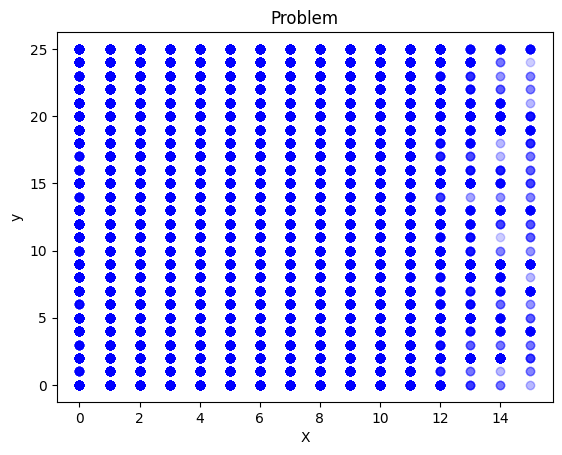

In [4]:
plt.plot(x_train, y_train, 'bo', alpha = 0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Problem')

Analyze class imbalance in the targets

In [5]:
counts = np.bincount(y_train)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 461 (3.84% of total)


Normalize the data using training set statistics

In [6]:
mean = np.mean(x_train, axis=0)
x_train -= mean
x_val -= mean
std = np.std(x_train, axis=0)
x_train /= std
x_val /= std

Build a binary classification model

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [29]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(26, activation="softmax")
])


# /model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/30
38/38 - 6s - 153ms/step - accuracy: 0.6273 - loss: 1.3017 - val_accuracy: 0.6637 - val_loss: 2.3884
Epoch 2/30
38/38 - 1s - 26ms/step - accuracy: 0.8302 - loss: 0.5558 - val_accuracy: 0.7446 - val_loss: 1.9961
Epoch 3/30
38/38 - 1s - 27ms/step - accuracy: 0.8885 - loss: 0.3625 - val_accuracy: 0.8092 - val_loss: 1.5612
Epoch 4/30
38/38 - 1s - 30ms/step - accuracy: 0.9073 - loss: 0.2861 - val_accuracy: 0.8583 - val_loss: 1.1865
Epoch 5/30
38/38 - 1s - 29ms/step - accuracy: 0.9336 - loss: 0.2105 - val_accuracy: 0.8879 - val_loss: 0.8210
Epoch 6/30
38/38 - 1s - 29ms/step - accuracy: 0.9390 - loss: 0.1776 - val_accuracy: 0.8950 - val_loss: 0.6085
Epoch 7/30
38/38 - 1s - 29ms/step - accuracy: 0.9532 - loss: 0.1396 - val_accuracy: 0.9000 - val_loss: 0.4667
Epoch 8/30
38/38 - 1s - 29ms/step - accuracy: 0.9621 - loss: 0.1185 - val_accuracy: 0.9179 - val_loss: 0.3436
Epoch 9/30
38/38 - 0s - 11ms/step - accuracy: 0.9654 - loss: 0.1090 - val_accuracy: 0.9350 - val_loss: 0.2439
Epoch 10/

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

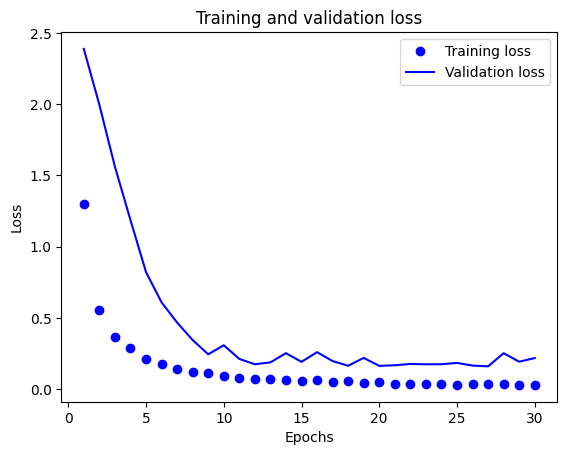

In [31]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [32]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1195 - loss: 37.9507
Test loss: 37.33217239379883
Test accuracy: 0.13449999690055847


In [33]:
for layer in model.layers: print(layer.get_weights())

[array([[-0.03142034,  0.05689566,  0.08578156, ...,  0.06255765,
         0.0315006 ,  0.06030973],
       [-0.09244098,  0.07588264,  0.02248206, ...,  0.08463722,
        -0.05986557,  0.08074761],
       [-0.08762417, -0.05333173, -0.09588093, ..., -0.04256343,
         0.07107452, -0.02217832],
       ...,
       [-0.03191124,  0.01470821, -0.00796559, ..., -0.01212948,
        -0.01210092,  0.01122897],
       [-0.09197047,  0.06576113,  0.00179459, ...,  0.07829398,
         0.05383879, -0.08600612],
       [ 0.01078444,  0.00928463,  0.03473433, ...,  0.00688145,
         0.07832351,  0.07611077]], dtype=float32), array([ 0.02527754, -0.0278893 , -0.02745248, -0.01641691, -0.03887281,
       -0.01229198, -0.0297782 ,  0.00378978, -0.04802028, -0.0020862 ,
       -0.02112005, -0.01328172, -0.01309942,  0.03884278, -0.01468089,
       -0.0642694 , -0.03734721, -0.04536576, -0.05336353, -0.01705169,
        0.00691287, -0.03954585, -0.05511516, -0.01449372, -0.03348786,
       -0.